In [2]:
from sklearn.datasets import fetch_openml
import os
#mnist_dir = os.path.join("dataset", "mnist")

In [1]:
import pandas as pd
train_set = pd.read_csv('./dataset/mnist/train.csv', sep=r'\s*,\s*',header=0, encoding='ascii', engine='python')

In [37]:
train_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
Xonly = train_set.drop("label", axis=1)


In [3]:
import numpy as np
X_train = np.array(Xonly.iloc[:,:])

In [52]:
X.colums.tolist

AttributeError: 'DataFrame' object has no attribute 'colums'

In [4]:
y_train = train_set["label"]

In [6]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [7]:
X_train.shape

(42000, 784)

In [8]:
y_train.shape

(42000,)

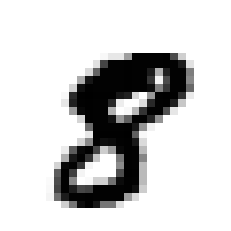

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def draw_train(y):
    some_digit = X_train[y]
    some_digit_image = some_digit.reshape(28, 28)

    plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show

draw_train(10)

In [10]:
y_train[10]

8

In [11]:
y_train = y_train.astype(np.uint8)

In [19]:
Test_set = pd.read_csv('./dataset/mnist/test.csv', sep=r'\s*,\s*',header=0, encoding='ascii', engine='python')

In [20]:
Test_set.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
test = Test_set

In [29]:
test = np.array(test.iloc[:, :])

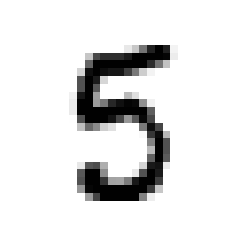

In [30]:
def draw_test(y):
    some_digit = test[y]
    some_digit_image = some_digit.reshape(28, 28)

    plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show
draw_test(10)
        

In [31]:
X_train, X_test = X_train[:50000], X_train[50000:]

In [32]:
y_train, y_test = y_train[:50000], y_train[50000:]

In [37]:
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)

In [38]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_8)



SGDClassifier(random_state=42)

In [39]:
predict = sgd_clf.predict([some_digit])
print(predict)

[ True]


In [53]:
from sklearn.model_selection import cross_val_score, cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)

In [54]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_8, y_train_pred)

array([[36641,  1296],
       [ 1712,  2351]])

In [57]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_8, y_train_pred)) 

print(recall_score(y_train_8, y_train_pred))


0.6446394296682204
0.5786364755107064


In [58]:
from sklearn.metrics import f1_score

f1_score(y_train_8, y_train_pred)

0.6098573281452658